# Boston Housing Data PreProcessing

STEP:01 Data Import & Libraries Import

In [54]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn



In [55]:
# version sklearn
print(sklearn.__version__)

1.6.1


StEP:02 Data Cleaning

In [56]:
# Import dataset Boston Housing with the help of openML dataset
from sklearn.datasets import fetch_openml
import pandas as pd

# Boston Housing datset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame
df.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [57]:
df.shape

(506, 14)

In [58]:
# Check  missing values
df.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [59]:
# Missing values fill up
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)
df



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [60]:
# Duplicate rows remove karo
df = df.drop_duplicates()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Step:03 Data Integration
Boston  data set already integrated

STEP:04 Data Transformation

In [61]:
from sklearn.preprocessing import MinMaxScaler

# Normalize values between 0 and 1
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


STEP:05 Data  Reduction 

In [62]:
from sklearn.decomposition import PCA

# PCA se dimensionality reduce  (e.g. 2 features)
# PCA (Principel component Analysis)
pca = PCA(n_components=2)
reduced_df = pca.fit_transform(df_scaled)
reduced_df

array([[-0.56709519, -0.15613447],
       [-0.42633164, -0.25114179],
       [-0.58068173, -0.143294  ],
       ...,
       [-0.18116716, -0.39693602],
       [-0.17393509, -0.38548429],
       [-0.14446137, -0.35112255]])

STEP:06 Data Discretization 


In [63]:
# Convert continuous 'MEDV' column to categories
df['price_bin'] = pd.cut(df['MEDV'], bins=3, labels=["Low", "Medium", "High"])
df['price_bin']

0      Medium
1      Medium
2      Medium
3      Medium
4        High
        ...  
501    Medium
502    Medium
503    Medium
504    Medium
505       Low
Name: price_bin, Length: 506, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Dummy column add just shows the conversion from categorical to numeric data

In [64]:
from sklearn.preprocessing import LabelEncoder
df['area_type'] = ['urban', 'rural', 'suburban'] * (len(df) // 3) + ['urban'] * (len(df) % 3)
encoder = LabelEncoder()
df['area_type_encoded'] = encoder.fit_transform(df['area_type'])

# Optional: Drop the original categorical column
df.drop('area_type', axis=1, inplace=True)

# Final check
print(df[['area_type_encoded']].head(25))


    area_type_encoded
0                   2
1                   0
2                   1
3                   2
4                   0
5                   1
6                   2
7                   0
8                   1
9                   2
10                  0
11                  1
12                  2
13                  0
14                  1
15                  2
16                  0
17                  1
18                  2
19                  0
20                  1
21                  2
22                  0
23                  1
24                  2


save data in to csv file

Check Dataset contain Outliers or not

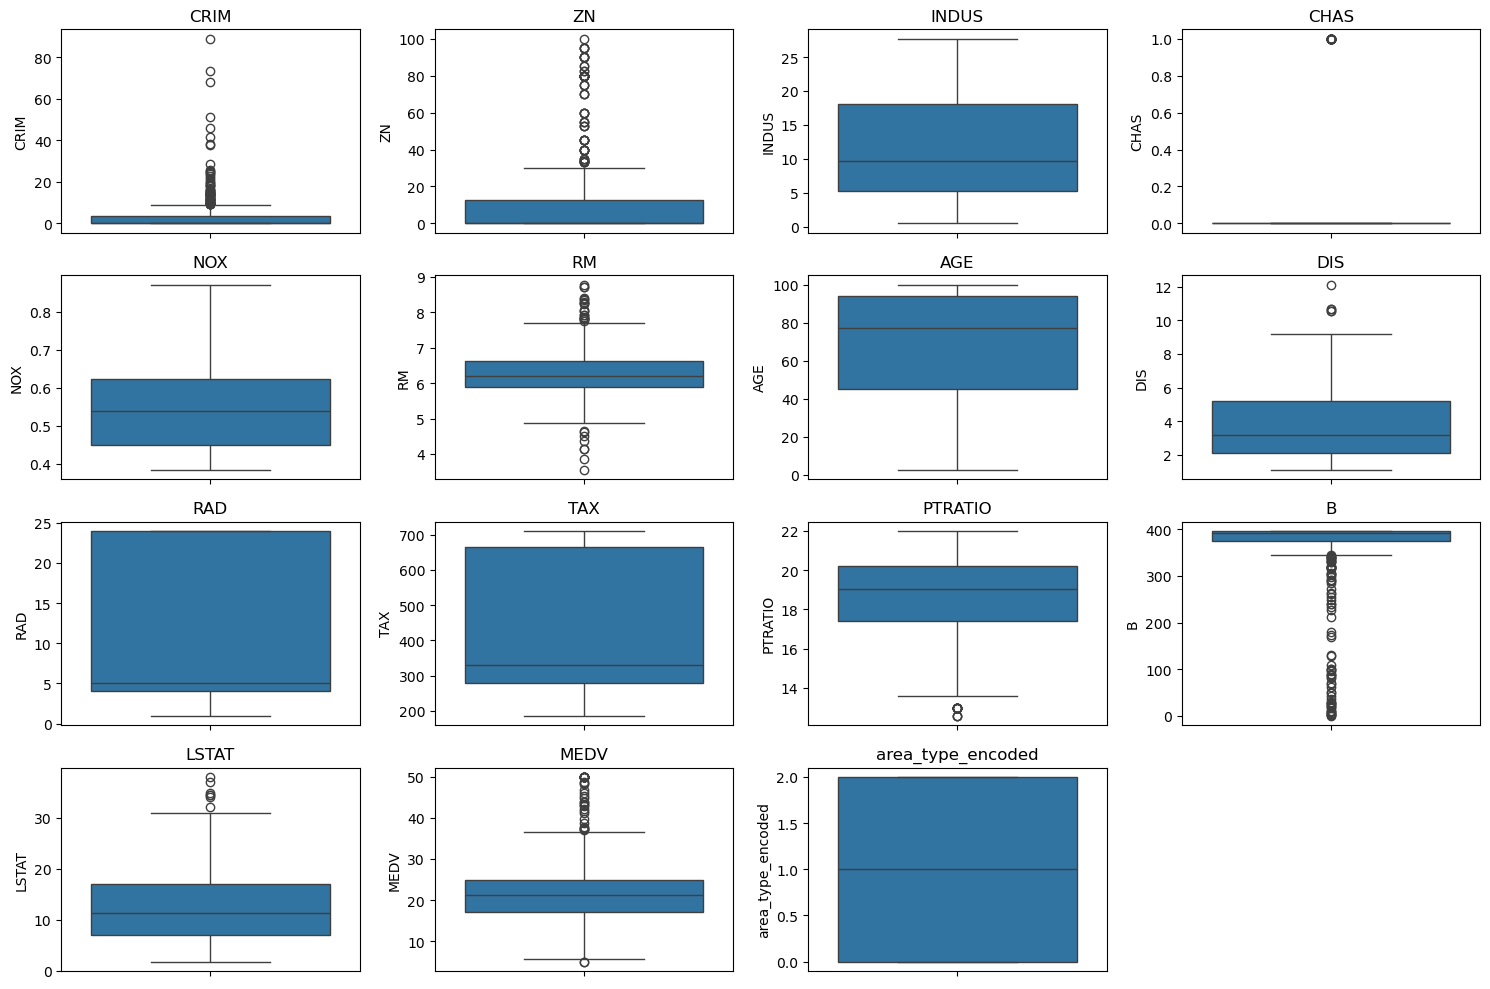

In [65]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Outliers remove

In [66]:
# Step 1: Get numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Step 2: Make a copy of the dataset to clean
df_cleaned = df.copy()

# Step 3: Replace outliers with bounds
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace lower outliers
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
    
    # Replace upper outliers
    df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])


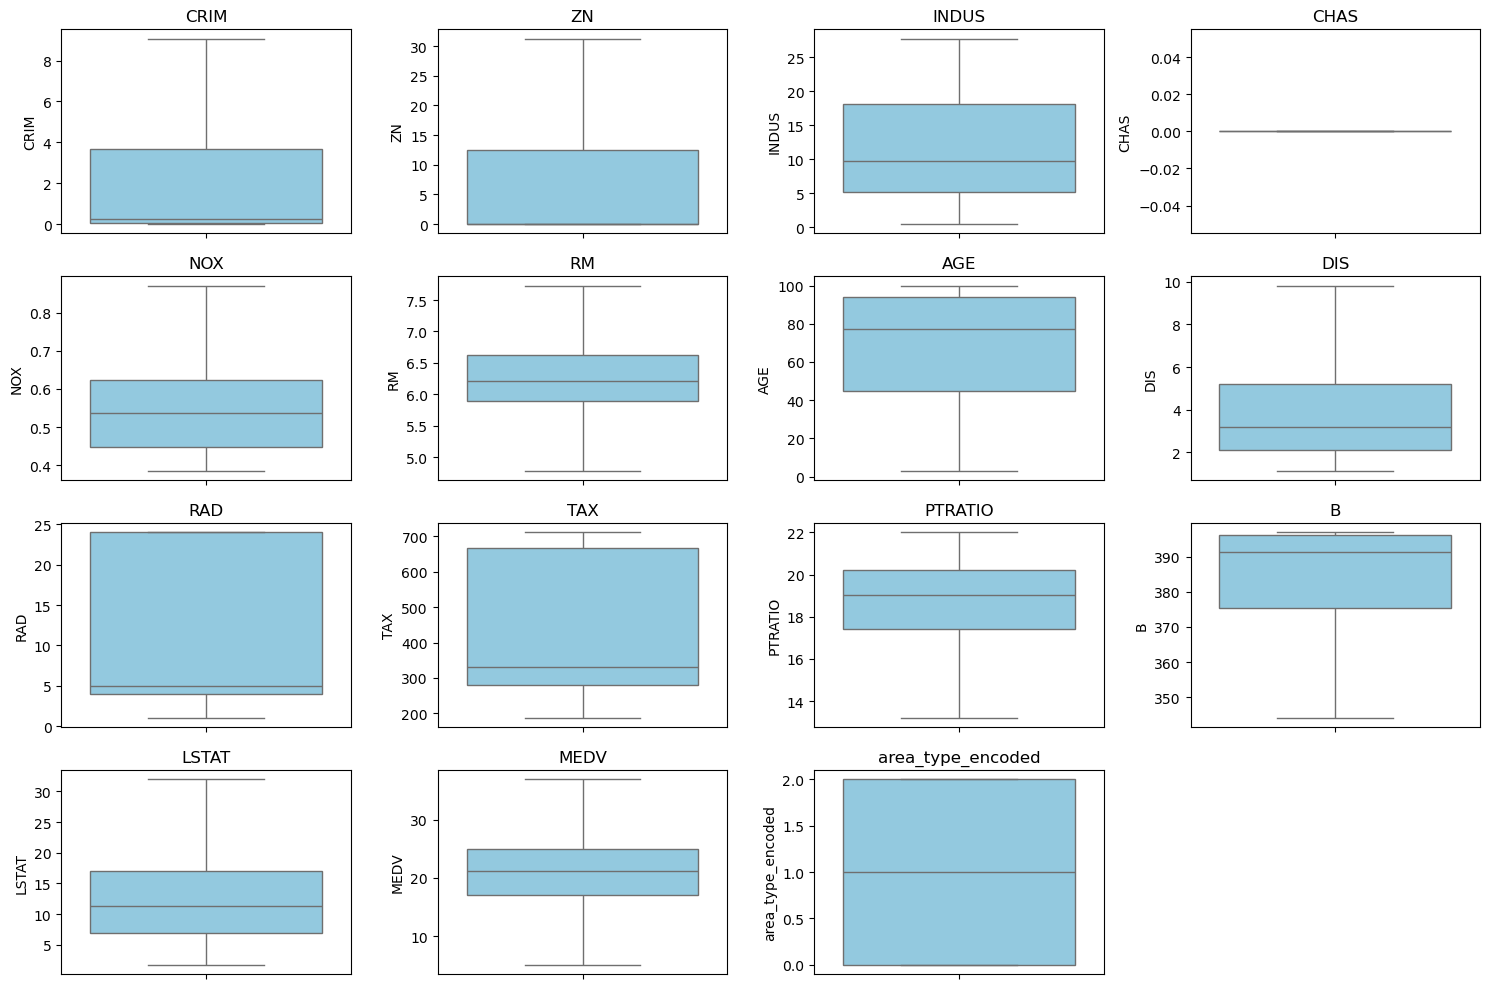

In [67]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_cleaned.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_cleaned[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

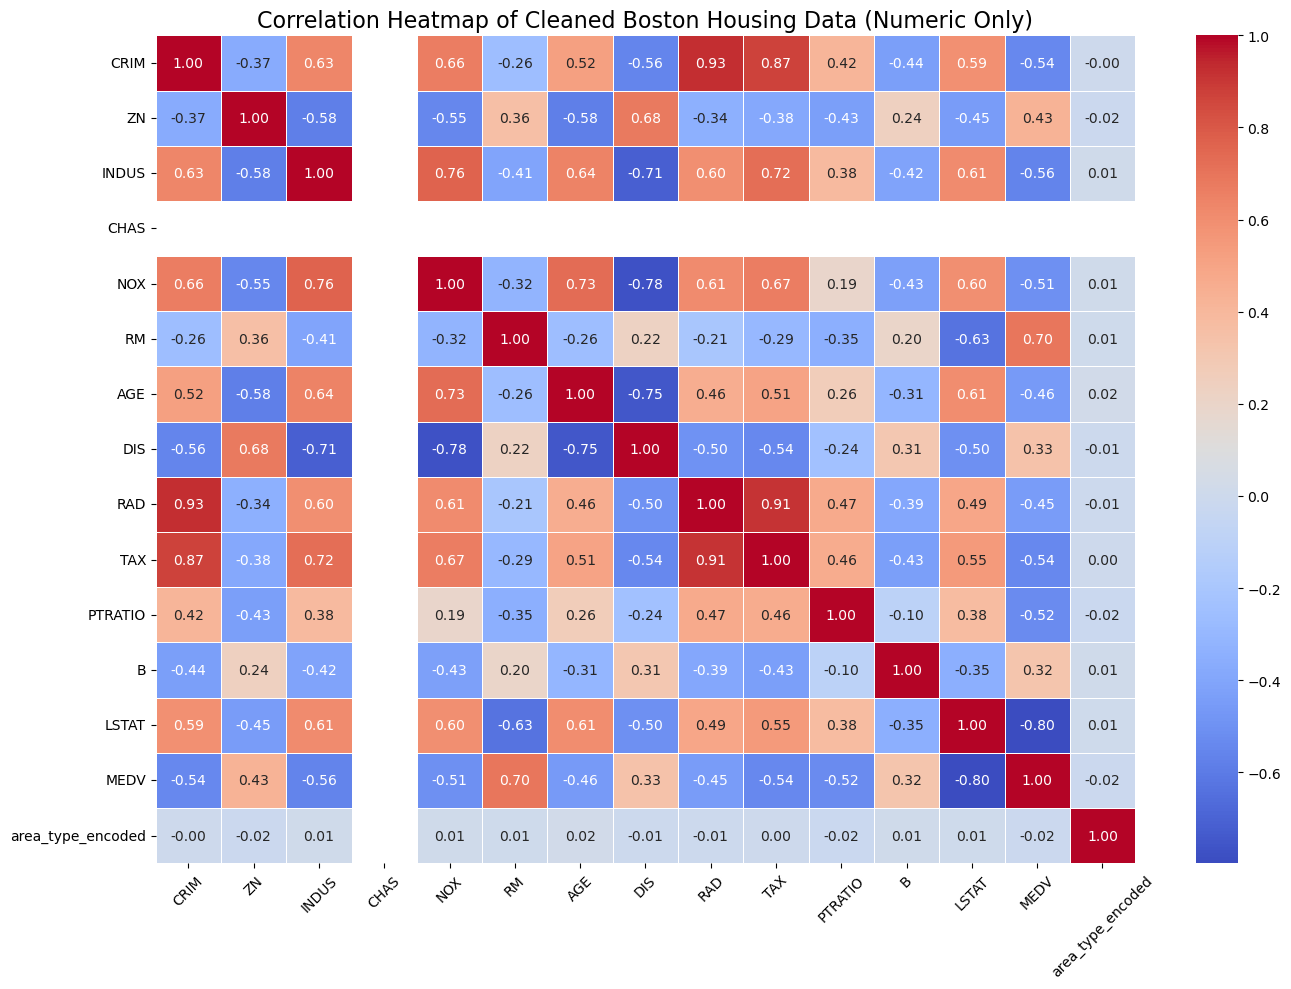

In [68]:
# Create a new DataFrame excluding the categorical column
numeric_df = df_cleaned.select_dtypes(include=['float64', 'int64'])
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Cleaned Boston Housing Data (Numeric Only)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df_cleaned.to_csv('Boston Housing(Data PreProcessing).csv')